# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

In [3]:
#!pip install nltk
#!pip install wordcloud

In [4]:
import nltk

In [5]:
#nltk.download()

# Load the data

In [6]:
reviews = pd.read_csv("Amazon reviews.csv")

In [7]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [8]:
#Dataset is scrapped from Amazon for Lenovo K8 mobile phones
# Review in the form of free text was scrapped and the user rating
# A user rating of 1,2,3 -> sentiment 0
# A user rating of 4 and 5 -> sentiment 1

In [9]:
reviews.shape

(14675, 2)

<AxesSubplot:>

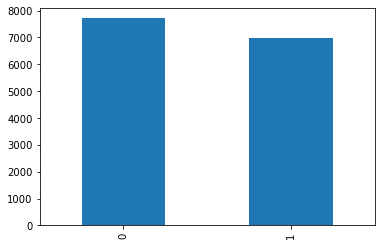

In [10]:
reviews.sentiment.value_counts().plot(kind='bar')

# Use resular expressions to get insignts about the reviews


In [11]:
#1. Find out the Reviews Which have some numbers followed by the gb
count=0
for review in reviews.review.values:
    review=review.strip()
    result=re.search("[0-9]+gb",review)
    if result:
        print(review)
        count+=1

Nice performance with 4gb RM and 64gb inbuilt memory
very bad and when lenovo and moto merged the standard of lenovo went to a worst condition. the 4gb decacore do nothing....dont buy it. very bad.....
Very nice looking phone.. Nice build quality... Awesome product ... In this price range it is a best phone... Nice bettory life and fast charging... It has all specifications ... Dual camera... Nice fingerPrint scanner... Awesome work with 4gb/64gb combination... Realy value for money...
It gets very hot while using. I was using Lenovo K4 for last one year and was more satisfied with that rather this one @ 13999. Main drawback of this phone arebeautiful_ Cast (screen mirror) doesn't work. Bluetooth is also disturbing. Touch screen is not as sensitive as it should be with 4gb ram and 64 GB internal memory with 10 core processer. Display got broken very early with in two months of use. It's very normal and not as strong as k4. Hand grip is not good. Voice clarity not good and Dolby sound i

In [12]:
print(count)

81


In [13]:
#Find out the Reviews Which have some numbers followed by the /-
count=0
for review in reviews.review.values:
    review = review.strip()
    result = re.search("[0-9]+/-",review)
    if result:
        print(review)
        count+=1

Firstly product not delivered on time dissatisfied 2 weeks.Secondly Android 7.1.1 naugat doesn't have call recording optionThirdly when selling product cost was 13999/- now why drastically dropped. 10999/-Fourthly when talking over the phone feels like nerve pulling to much radiation need immediate fix on this matter as it's safety and security of customer.Fifthly if any issues in hardware issues please let us know the service centers location. And please ensure hardware availability should be there at any time when customers booked.Finally as discribed about product all features are ok no issues found as mentioned earlier if call recording option would have added the this product would have been met the expectations.Camera quality is good not bad snap attached.
Bad quality of screen.Mobile was just fall from 1 ft. of height & screen was brokenCustomer care of Lenovo Jabalpur (MP) is not responding regarding the replacement of screen even on paid service basis. I have deposited Rs. 420

In [14]:
print(count)

28


Basic Text processing tasks: 
1. Text cleaning 

2. Get the visuals - word cloud and bar graph or frequency graph 

3. Converting text to numeric matrices

4. Advanced visuals using collocations(n-grams - unigrams, bigrams, trigrams)

5. Sentiment analysis and sentiment classification 

# Text cleaning

In [15]:
reviews_combined=" ".join(reviews.review.values)

In [16]:
all_terms=word_tokenize(reviews_combined.lower())

In [17]:
all_terms[:10]

['good',
 'but',
 'need',
 'updates',
 'and',
 'improvements',
 'worst',
 'mobile',
 'i',
 'have']

In [18]:
len(set(all_terms))

17602

In [19]:
fdist=FreqDist(all_terms)
fdist

FreqDist({'.': 13052, 'is': 10392, ',': 6890, 'phone': 6723, 'the': 6559, 'not': 6068, 'good': 5853, 'it': 5506, 'and': 5488, 'i': 4748, ...})

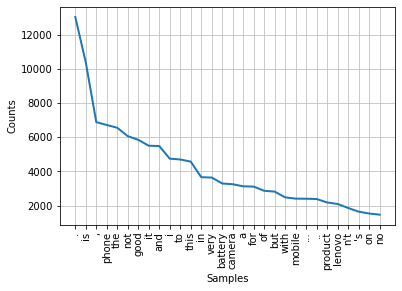

In [20]:
fdist.plot(30)
plt.show()

In [21]:
stop_nltk=stopwords.words("english")

In [22]:
stop_updated = stop_nltk + ["mobile","phone","lenovo","k8","note"]

In [23]:
reviews_updated1 = [term for term in all_terms if term not in stop_updated and len(term)>2]

In [24]:
print(reviews_updated1[:200])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'amazon', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', "n't", 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', '....', 'already', 'january', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'amazon', 'returning', '.highly', 'disappointing', 'amazon', 'telling', "n't", 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot', 'really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', '...', 'hanging', 'problems', '...', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches

In [25]:
stemmer_s=SnowballStemmer('english')

In [26]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated1]

In [27]:
print(len(set(reviews_updated_stem)))

14608


In [28]:
def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub(r"[^\w\s]","",result)
    tokens = word_tokenize(result1.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens \
               if term not in stop_updated and \
               len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [29]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [30]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...


# Word cloud on cleaned dataset

In [31]:
reviews_combined_clean=" ".join(reviews.clean_review.values)

In [32]:
reviews_combined_clean[:500]

'good need updat improv worst bought ever batteri drain like hell backup hour internet use even put idl get dischargedthi biggest lie amazon lenov expect make full say batteri 4000mah booster charger fake take least hour fulli chargeddont know surviv make full uspleas dont els regret like get cash back alreadi januari good worst everthey chang last problem still amazon return high disappoint amazon tell dont buyim total disappointedpoor batterypoor camerawast money awesom charg heat allotr genuin'

In [33]:
word_cloud=WordCloud(width=900,height=900,background_color='white',max_words=150).generate_from_text(reviews_combined_clean)

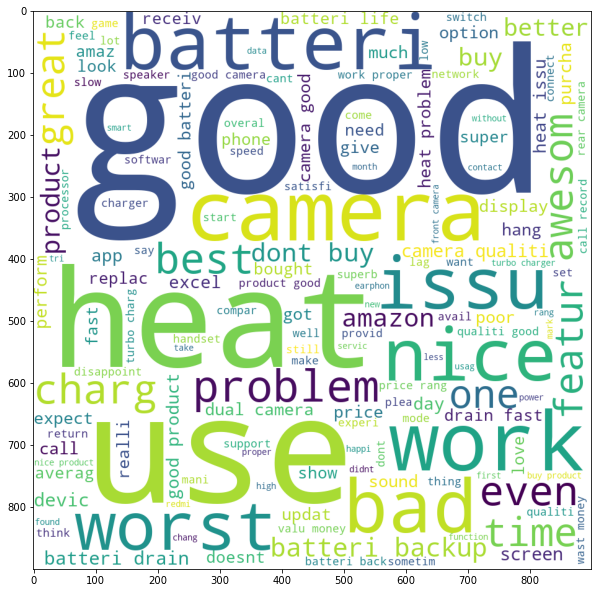

In [34]:
plt.figure(figsize=[10,15])
plt.imshow(word_cloud)
plt.show()

In [35]:
all_terms=word_tokenize(reviews_combined_clean)
fdist=FreqDist(all_terms)

In [36]:
fdist

FreqDist({'good': 5636, 'batteri': 3178, 'camera': 3160, 'product': 2172, 'heat': 1971, 'work': 1748, 'charg': 1709, 'use': 1701, 'problem': 1493, 'issu': 1447, ...})

In [37]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

In [38]:
df_dist.head()

,words,freq
0,good,5636
1,need,322
2,updat,675
3,improv,126
4,worst,895


<AxesSubplot:xlabel='words'>

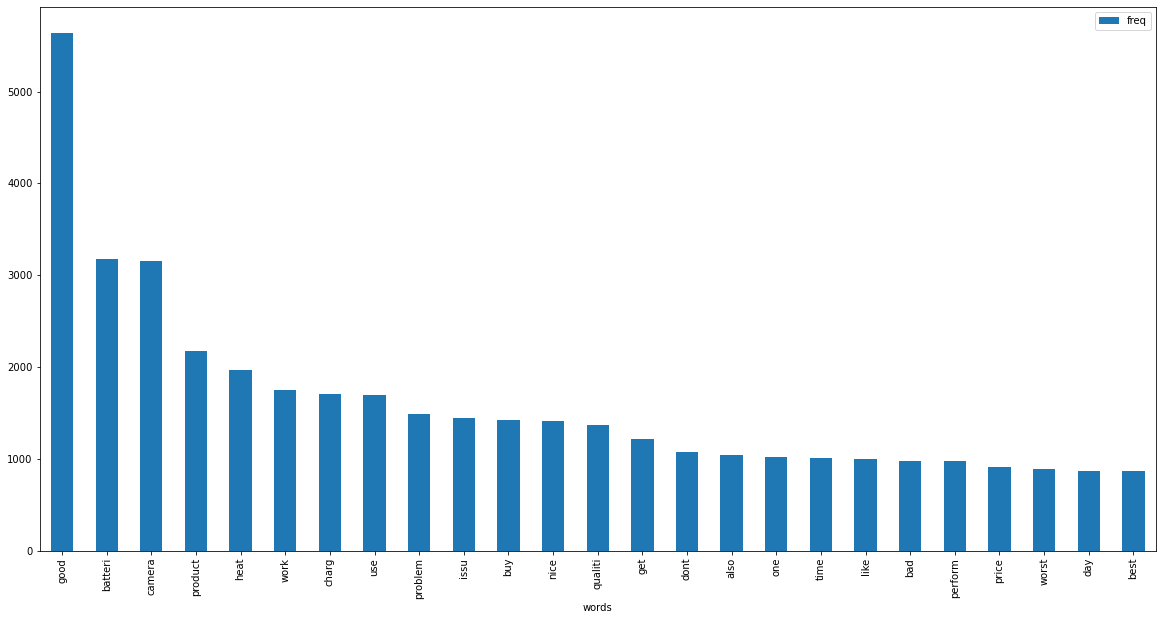

In [39]:
df_dist.sort_values(ascending=False,by="freq").head(25).\
plot.bar(x="words",y="freq",figsize=(20,10))

# Plot the bar graph for top 25 frequenctly used bigrams

In [40]:
bigram_count_vectorizer=CountVectorizer(ngram_range=(2,2),max_features=150)

In [41]:
X_bigram=bigram_count_vectorizer.fit_transform(reviews['clean_review'])

In [42]:
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [43]:
print(bigram_count_vectorizer.get_feature_names()[:20])

['4000 mah', '4gb ram', 'also good', 'back camera', 'backup good', 'bad experi', 'bad product', 'batteri back', 'batteri backup', 'batteri charg', 'batteri drain', 'batteri get', 'batteri good', 'batteri heat', 'batteri last', 'batteri life', 'batteri perform', 'batteri problem', 'best price', 'build qualiti']


<AxesSubplot:>

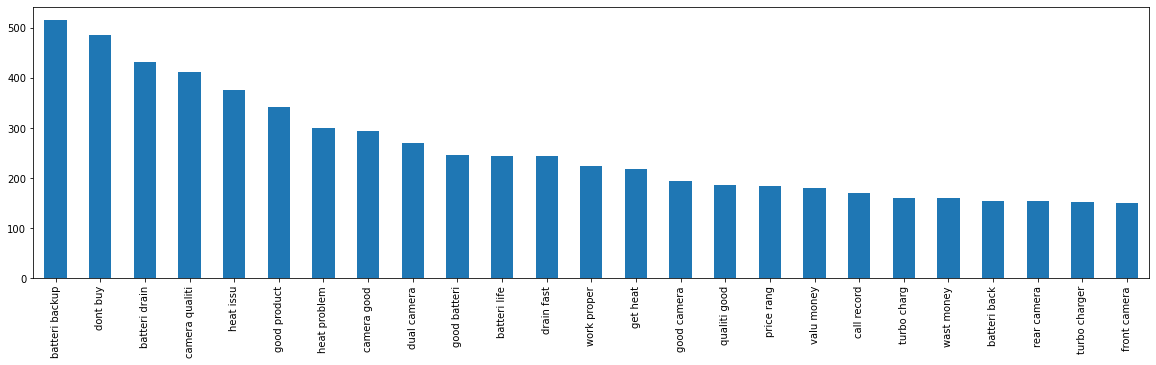

In [44]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))  

# Sentiment Classification



Step1: get the X and y

Step2: converting text to numbers (countvectorizer or tfidfvectorizer)

Step3: Split into test and train

Step4: train the model

Step5: test and get the accuracy scores

Step6: Make predictions for an Input Review

In [45]:
#tf-idf
Tfidf_vect = TfidfVectorizer()
X = reviews['review']
y = reviews['sentiment']

In [46]:
#BagOfWords
count_vect = CountVectorizer() 
X_bow = reviews['review']
y_bow = reviews['sentiment']

In [47]:
X = Tfidf_vect.fit_transform(X)

In [48]:
X_bow=count_vect.fit_transform(X_bow)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,shuffle=True, test_size=0.3,random_state = 0)
X_train_bow, X_test_bow, Y_train_bow, Y_test_bow = train_test_split(X_bow,
                                                          y_bow,
                                                          test_size=0.3,
                                                          random_state=0)

# Accuracy Tester

In [50]:
def accuracy(clf, X, Y, preds):
    metrics.plot_confusion_matrix(clf, X, Y)
    plt.show()
    
    print(f'accuracy score {metrics.accuracy_score(Y, preds)}')
    print(f'Precision {metrics.precision_score(Y, preds)}')
    print(f'f1_score {metrics.f1_score(Y, preds)}')
    print(f'Recall Score {metrics.recall_score(Y, preds)}')
    tn, fp, fn, tp = metrics.confusion_matrix(Y_test, preds).ravel()

    specificity = tn / (tn+fp)

    print(f'Specificity {specificity}')

# Logistic Regression Model

In [51]:
#tfidf
logreg = LogisticRegression()

In [52]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [53]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [54]:
y_test_pred = logreg.predict(X_test)

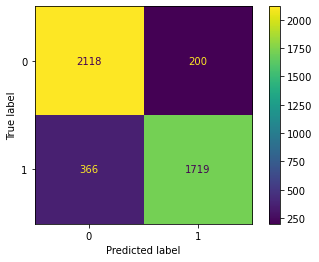

accuracy score 0.8714512832159891
Precision 0.8957790515893694
f1_score 0.8586413586413587
Recall Score 0.8244604316546763
Specificity 0.913718723037101


In [55]:
accuracy(logreg, X_test, Y_test, y_test_pred)

In [62]:
#Make Predictions:
review1 = "This is a fantastic mobile really like it "
review2 = "  The battery drains fast"

In [63]:
review = [review1,review2]

In [64]:
c_review = list(map(clean_txt, review))

In [65]:
X_test_new = count_vect.transform(c_review)

In [66]:
y_test_pred_new = logreg.predict(X_test_new)

In [67]:
y_test_pred_new

array([1, 0], dtype=int64)

In [124]:
#bow
logreg_bow = LogisticRegression()

In [125]:
logreg_bow.fit(X_train_bow,Y_train_bow)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [126]:
y_test_pred = logreg_bow.predict(X_test_bow)

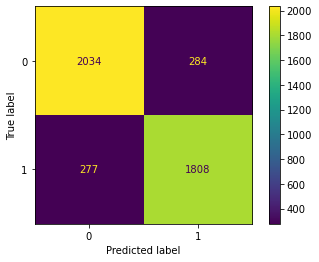

accuracy score 0.8725868725868726
Precision 0.864244741873805
f1_score 0.8656930811587263
Recall Score 0.8671462829736211
Specificity 0.8774805867126834


In [127]:
accuracy(logreg_bow, X_test_bow, Y_test_bow, y_test_pred)

# Naive Bayes

In [128]:
nb = MultinomialNB()
nb_bow = MultinomialNB()

In [129]:
nb.fit(X_train,Y_train)

MultinomialNB()

In [130]:
y_test_pred = nb.predict(X_test)

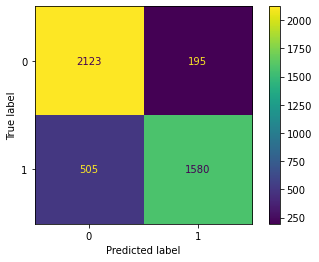

accuracy score 0.8410174880763116
Precision 0.8901408450704226
f1_score 0.8186528497409327
Recall Score 0.7577937649880095
Specificity 0.9158757549611735


In [132]:
accuracy(nb, X_test, Y_test, y_test_pred)

In [133]:
nb_bow .fit(X_train_bow ,Y_train_bow )

MultinomialNB()

In [134]:
y_test_pred = nb_bow .predict(X_test_bow )

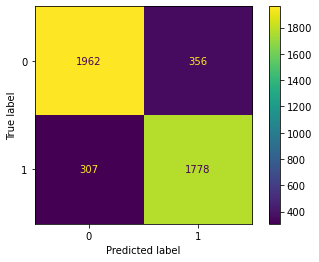

accuracy score 0.8494208494208494
Precision 0.8331771321462043
f1_score 0.842853756814411
Recall Score 0.8527577937649881
Specificity 0.8464193270060397


In [136]:
accuracy(nb_bow , X_test_bow , Y_test_bow , y_test_pred)

# Gradient Boosting Model

In [137]:
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)
clf_bow=GradientBoostingClassifier(n_estimators=80,random_state=400)

In [138]:
clf.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [139]:
y_test_pred = clf.predict(X_test)

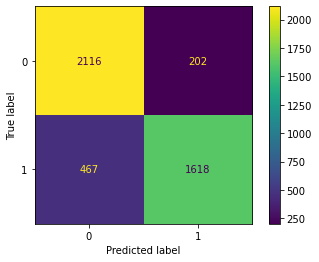

accuracy score 0.8480581421757892
Precision 0.889010989010989
f1_score 0.8286811779769526
Recall Score 0.7760191846522781
Specificity 0.9128559102674719


In [140]:
accuracy(clf, X_test, Y_test, y_test_pred)

In [141]:
clf_bow.fit(X_train_bow,Y_train_bow)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [142]:
y_test_pred = clf_bow.predict(X_test_bow)

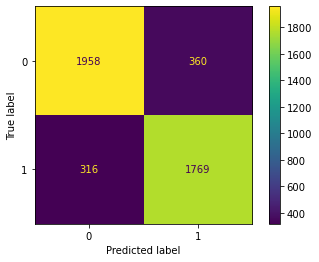

accuracy score 0.8464683170565523
Precision 0.8309065288868013
f1_score 0.8395823445657331
Recall Score 0.8484412470023981
Specificity 0.8446937014667817


In [143]:
accuracy(clf_bow, X_test_bow, Y_test_bow, y_test_pred)

# SVC Model

In [144]:
svc = SVC()
svc_bow = SVC()

In [145]:
#TF-IDF
svc.fit(X_train,Y_train)

SVC()

In [146]:
y_test_pred = svc.predict(X_test)

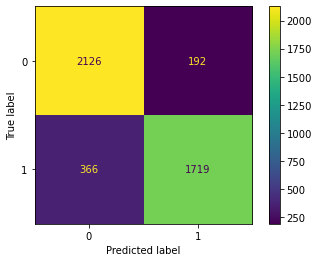

accuracy score 0.8732682262094027
Precision 0.8995290423861853
f1_score 0.8603603603603602
Recall Score 0.8244604316546763
Specificity 0.917169974115617


In [147]:
accuracy(svc, X_test, Y_test,y_test_pred)

In [148]:
#BagofWords
svc_bow.fit(X_train_bow,Y_train_bow)

SVC()

In [149]:
y_test_pred = svc_bow.predict(X_test_bow)

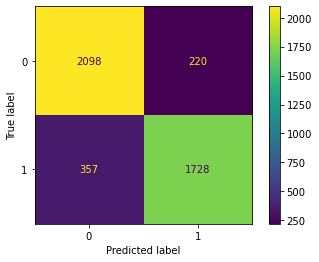

accuracy score 0.8689529866000454
Precision 0.8870636550308009
f1_score 0.8569303248202331
Recall Score 0.8287769784172662
Specificity 0.905090595340811


In [150]:
accuracy(svc_bow, X_test_bow, Y_test_bow,y_test_pred)

# Random Forest Model

In [151]:
rf_bow = RandomForestClassifier()
rf = RandomForestClassifier()

In [152]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [153]:
preds = rf.predict(X_test)

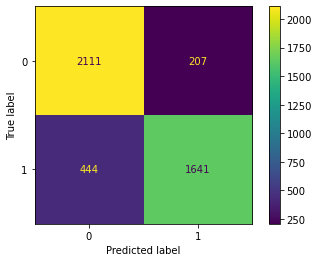

accuracy score 0.8521462639109698
Precision 0.887987012987013
f1_score 0.8344774980930588
Recall Score 0.7870503597122303
Specificity 0.9106988783433995


In [154]:
accuracy(rf, X_test, Y_test, preds)

In [155]:
#BagofWords
rf_bow.fit(X_train_bow, Y_train_bow)

RandomForestClassifier()

In [156]:
preds = rf_bow.predict(X_test)

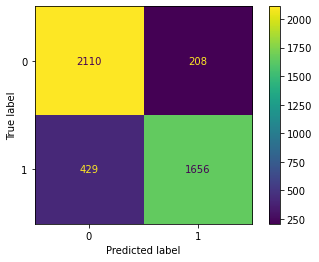

accuracy score 0.5321371791960027
Precision 0.5031242189452637
f1_score 0.6615182385803483
Recall Score 0.9654676258992806
Specificity 0.14236410698878343


In [157]:
accuracy(rf_bow, X_test_bow, Y_test_bow, preds)

# Sentiment Prediction Strategy 2: Using popular package - Vader

In [158]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [159]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [160]:
reviews['score_vader'] = reviews.review.apply(get_vader_sentiment)

In [161]:
reviews['sent_prediction_vader'] = reviews.score_vader.apply(lambda x:1 if x>0.3 else 0)

In [164]:
reviews.head()

,sentiment,review,clean_review,score_vader,sent_prediction_vader
0,1,Good but need updates and improvements,good need updat improv,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0.0000,0
3,1,Good,good,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-0.8289,0


In [163]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7990459965928449

# Sentiment Prediction Strategy 1: Word based scoring

In [175]:
afinn=pd.read_excel('afinn-111.xlsx')
afinn.columns = ['Term','Score']
term_scores = dict(afinn.values)

In [176]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [177]:
reviews['sent_score'] = reviews.clean_review.apply(get_sentiment)

In [178]:
reviews.head()

,sentiment,review,clean_review,score_vader,sent_prediction_vader,sent_score
0,1,Good but need updates and improvements,good need updat improv,0.5994,1,3
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-0.8720,0,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0.0000,0,0
3,1,Good,good,0.4404,1,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-0.8289,0,-7


In [179]:
reviews['sent_prediction'] =reviews.sent_score.apply(lambda x:1 if x>0 else 0)

In [180]:
reviews.head()

,sentiment,review,clean_review,score_vader,sent_prediction_vader,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,0.5994,1,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-0.8720,0,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0.0000,0,0,0
3,1,Good,good,0.4404,1,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-0.8289,0,-7,0


In [181]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

0.7105962521294719